In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 출력 옵션 변경
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 100)

# 수질 데이터 전처리

In [19]:
# 2018년 수질 데이터
df = pd.read_excel('../data/rawdata/water/water_2018.xlsx')
df.head()

,검사월,수도사업자,시설명,소재지,수원,시설용량(㎥/일),채수년월일,일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,강북,경기도 남양주시,하천수,1000000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,광암,경기도 하남시,하천수,400000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,구의,서울특별시 광진구,하천수,500000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,적합,적합,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,뚝도,서울특별시 성동구,하천수,700000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,적합,적합,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,암사,서울특별시 강동구,하천수,1600000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,적합,적합,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [20]:
df.shape

(4985, 66)

In [21]:
# dtype 확인 - object: 총대장균, 대장균, 냄새, 맛
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   검사월                                     4985 non-null   object 
 1   수도사업자                                   4985 non-null   object 
 2   시설명                                     4985 non-null   object 
 3   소재지                                     2599 non-null   object 
 4   수원                                      4985 non-null   object 
 5   시설용량(㎥/일)                               4985 non-null   int64  
 6   채수년월일                                   4985 non-null   object 
 7   일반세균(기준:100/ 단위:(CFU/mL))               4985 non-null   int64  
 8   총대장균군(기준:0/ 단위:MPN)                     4985 non-null   object 
 9   대장균/분원성대장균군(기준:0/ 단위:MPN)               4985 non-null   object 
 10  납(기준:0.01/ 단위:(mg/L))                   4953 non-null   floa

In [22]:
# 필요없는 컬럼 drop
df.drop(['시설명', '소재지', '수원', '채수년월일'], axis=1, inplace=True)
df

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.000,0.0
1,2018-01,서울특별시,400000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.000,0.0
2,2018-01,서울특별시,500000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,적합,적합,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.000,0.0
3,2018-01,서울특별시,700000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,적합,적합,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.000,0.0
4,2018-01,서울특별시,1600000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,적합,적합,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2018-12,제주특별자치도,37000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44,0.0,적합,적합,0.0,0,0.0,7.9,0.002,13.9,105,0.0,0.0,0.06,5,0.0,0.0,0.000,0.40,0.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN
4981,2018-12,제주특별자치도,4000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.0,적합,적합,0.0,0,0.0,7.7,0.003,7.7,73,0.0,0.0,0.04,3,0.0,0.0,0.000,0.32,0.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN
4982,2018-12,제주특별자치도,10000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,0.0,적합,적합,0.0,0,0.0,7.8,0.000,11.7,107,0.0,0.0,0.04,5,0.0,0.0,0.000,0.74,0.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN
4983,2018-12,제주특별자치도,16000,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [23]:
# 총대장균, 대장균 컬럼(8~9열)에서 '불검출' 개수 확인하여 많으면 컬럼을 삭제하도록 함
df.iloc[:, 4].value_counts()
df.iloc[:, 5].value_counts()    # 모두 불검출

# 위 두 컬럼은 제외
df = df.drop(['총대장균군(기준:0/ 단위:MPN)', '대장균/분원성대장균군(기준:0/ 단위:MPN)'], axis=1)
df.head(2)

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


In [24]:
# 냄새, 맛 컬럼
df.loc[:, '냄새(기준:0/ 단위:(mg/L))'].value_counts()   
df.loc[:, '맛(기준:0/ 단위:(mg/L))'].value_counts()        # 모두 적합이므로 컬럼 삭제

df = df.drop(['냄새(기준:0/ 단위:(mg/L))', '맛(기준:0/ 단위:(mg/L))'], axis=1)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [10]:
df.shape

(4985, 58)

In [25]:
# 탁도 단위(NTU)의 호환성 때문에 컬럼 drop
df.drop('탁도(기준:0.5/ 단위:(NTU))', axis=1, inplace=True)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


* 탁도: NTU --> SiO2 ppm (1mg/1L)  -->  단위 환산의 부정확성 때문에 drop
* 색도 1도: 백금 1㎎이 물 1L에 용해되어 있을 때 나타나는 색  -->  mg/L이므로 계산에 문제 없음
* 나중에 분석이 다 끝나고 나면 컬럼명을 간단하게 바꾸는 것이 좋을 수도 있을 듯!

In [26]:
df.rename({'수도사업자':'지역'}, axis=1, inplace=True)
df.head(2)

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


## NaN을 0으로 치환
* NaN을 0으로 치환하여 0과 NaN을 똑같이 취급함

In [13]:
# 0을 NaN로 바꾸고 결측치 개수 = 행 개수(4985)인 경우만 drop하기 
df.replace(np.nan, 0, inplace=True)

# 모든 컬럼에 대하여 결측치 개수 확인
nan_num = df.sum()                        # 결측치 수
drop_list = list(nan_num[nan_num == 0].index)   # drop할 컬럼명 list (5개 항목)
print(drop_list)
water = df.drop(drop_list, axis=1)                 # 수질 전처리 파일명: water 

['수은(기준:0.001/ 단위:(mg/L))', '크롬(기준:0.05/ 단위:(mg/L))', '페놀(기준:0.005/ 단위:(mg/L))', '파라티온(기준:0.06/ 단위:(mg/L))', '페니트로티온(기준:0.04/ 단위:(mg/L))']


In [14]:
water.head()

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [15]:
print(water.shape)
print(water.columns)

(4985, 52)
Index(['검사월', '지역', '시설용량(㎥/일)', '일반세균(기준:100/ 단위:(CFU/mL))',
       '납(기준:0.01/ 단위:(mg/L))', '불소(기준:1.5/ 단위:(mg/L))',
       '비소(기준:0.01/ 단위:(mg/L))', '셀레늄(기준:0.01/ 단위:(mg/L))',
       '시안(기준:0.01/ 단위:(mg/L))', '암모니아성질소(기준:0.5/ 단위:(mg/L))',
       '질산성질소(기준:10/ 단위:(mg/L))', '카드뮴(기준:0.005/ 단위:(mg/L))',
       '붕소(기준:1/ 단위:(mg/L))', '다이아지논(기준:0.02/ 단위:(mg/L))',
       '1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))', '카바릴(기준:0.07/ 단위:(mg/L))',
       '1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))', '테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))',
       '트리클로로에틸렌(기준:0.03/ 단위:(mg/L))', '디클로로메탄(기준:0.02/ 단위:(mg/L))',
       '벤젠(기준:0.01/ 단위:(mg/L))', '톨루엔(기준:0.7/ 단위:(mg/L))',
       '에틸벤젠(기준:0.3/ 단위:(mg/L))', '크실렌(기준:0.5/ 단위:(mg/L))',
       '1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))', '사염화탄소(기준:0.002/ 단위:(mg/L))',
       '1,4-다이옥산(기준:0.05/ 단위:(mg/L))', '경도(기준:300/ 단위:(mg/L))',
       '과망간산칼륨소비량(기준:10/ 단위:(mg/L))', '동(기준:1/ 단위:(mg/L))', '색도(기준:5/ 단위:(도))',
       '세제(기준:0.5/ 단위:(mg/L))', '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)',
       '

## NaN 평균값 치환 방법
둘이 결과가 다른데 뭐가 맞는 걸까?

### Transform 이용

In [28]:
x = df.groupby('지역').transform(lambda x: x.mean())    # grouping한 컬럼(지역), object인 '검사월'은 포함 안됨
x.head(10)

,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,821666.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0000,13.180556,0.011250,0.000019,0.021194,0.455000,0.014306,0.000603,0.000000,0.000175,0.000000,0.003264,0.005542,0.001306,0.0
1,821666.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0000,13.180556,0.011250,0.000019,0.021194,0.455000,0.014306,0.000603,0.000000,0.000175,0.000000,0.003264,0.005542,0.001306,0.0
2,821666.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0000,13.180556,0.011250,0.000019,0.021194,0.455000,0.014306,0.000603,0.000000,0.000175,0.000000,0.003264,0.005542,0.001306,0.0
3,821666.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0000,13.180556,0.011250,0.000019,0.021194,0.455000,0.014306,0.000603,0.000000,0.000175,0.000000,0.003264,0.005542,0.001306,0.0
4,821666.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0000,13.180556,0.011250,0.000019,0.021194,0.455000,0.014306,0.000603,0.000000,0.000175,0.000000,0.003264,0.005542,0.001306,0.0
5,821666.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0000,13.180556,0.011250,0.000019,0.021194,0.455000,0.014306,0.000603,0.000000,0.000175,0.000000,0.003264,0.005542,0.001306,0.0
6,554439.024390,0.0,0.0,0.015854,0.0,0.0,0.0,0.0,0.0,0.000000,1.621951,0.0,0.033659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000195,78.170732,1.734146,0.000000,0.0,0.0,6.878049,0.003220,28.451220,193.000000,0.0,0.0000,39.975610,0.000000,0.000102,0.024366,0.591707,0.013683,0.000673,0.000322,0.000071,0.000017,0.002293,0.007024,0.003171,0.0
7,554439.0

In [31]:
y = df[['검사월', '지역']]               # 빠진 컬럼

In [35]:
# df와 같은 형태로 만들기 위해서 concat --> 결과물은 평균값으로 모든 열이 치환된 상태
z = pd.concat([y, x], axis=1)
z.head()

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,821666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0,13.180556,0.01125,0.000019,0.021194,0.455,0.014306,0.000603,0.0,0.000175,0.0,0.003264,0.005542,0.001306,0.0
1,2018-01,서울특별시,821666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0,13.180556,0.01125,0.000019,0.021194,0.455,0.014306,0.000603,0.0,0.000175,0.0,0.003264,0.005542,0.001306,0.0
2,2018-01,서울특별시,821666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0,13.180556,0.01125,0.000019,0.021194,0.455,0.014306,0.000603,0.0,0.000175,0.0,0.003264,0.005542,0.001306,0.0
3,2018-01,서울특별시,821666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0,13.180556,0.01125,0.000019,0.021194,0.455,0.014306,0.000603,0.0,0.000175,0.0,0.003264,0.005542,0.001306,0.0
4,2018-01,서울특별시,821666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.005556,0.0,0.012083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.069444,1.002778,0.000931,0.0,0.0,7.101389,0.002639,22.055556,119.736111,0.0,0.0,13.180556,0.01125,0.000019,0.021194,0.455,0.014306,0.000603,0.0,0.000175,0.0,0.003264,0.005542,0.001306,0.0


* 아이디어 참고(last exmaple): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.fillna.html?highlight=fillna 

In [36]:
water = df.fillna(z)        # 전처리한 데이터프레임: water
water.head()

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [37]:
water.isnull().sum()            # null값 하나도 없음

검사월                                       0
지역                                        0
시설용량(㎥/일)                                 0
일반세균(기준:100/ 단위:(CFU/mL))                 0
납(기준:0.01/ 단위:(mg/L))                     0
불소(기준:1.5/ 단위:(mg/L))                     0
비소(기준:0.01/ 단위:(mg/L))                    0
셀레늄(기준:0.01/ 단위:(mg/L))                   0
수은(기준:0.001/ 단위:(mg/L))                   0
시안(기준:0.01/ 단위:(mg/L))                    0
크롬(기준:0.05/ 단위:(mg/L))                    0
암모니아성질소(기준:0.5/ 단위:(mg/L))                0
질산성질소(기준:10/ 단위:(mg/L))                   0
카드뮴(기준:0.005/ 단위:(mg/L))                  0
붕소(기준:1/ 단위:(mg/L))                       0
페놀(기준:0.005/ 단위:(mg/L))                   0
다이아지논(기준:0.02/ 단위:(mg/L))                 0
파라티온(기준:0.06/ 단위:(mg/L))                  0
1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))    0
페니트로티온(기준:0.04/ 단위:(mg/L))                0
카바릴(기준:0.07/ 단위:(mg/L))                   0
1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))          0
테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))   

### Apply 이용

In [49]:
# 다른 방법
a = df.groupby('지역').apply(lambda x: x.fillna(x.mean()))
a.head()                              # Transfrom과는 달리 멀티인덱스로 반환됨
a.sort_index(level=1, inplace=True)
a.head()

검사월     지역  시설용량(㎥/일)  일반세균(기준:100/ 단위:(CFU/mL))  \
지역                                                              
서울특별시 0  2018-01  서울특별시    1000000                          0   
      1  2018-01  서울특별시     400000                          0   
      2  2018-01  서울특별시     500000                          0   
      3  2018-01  서울특별시     700000                          0   
      4  2018-01  서울특별시    1600000                          0   

         납(기준:0.01/ 단위:(mg/L))  불소(기준:1.5/ 단위:(mg/L))  비소(기준:0.01/ 단위:(mg/L))  \
지역                                                                              
서울특별시 0                    0.0                    0.0                     0.0   
      1                    0.0                    0.0                     0.0   
      2                    0.0                    0.0                     0.0   
      3                    0.0                    0.0                     0.0   
      4                    0.0                    0.0                     0.0   

         셀레늄(기준:0.01/ 단위:(mg/L))  수은(기준:0.001/ 단위:(mg/L))  \
지역                                                          
서울특별시 0                      0.0                      0.0   
      1                      0.0                      0.0   
      2                      0.0                      0.0   
      3                      0.0                      0.0   
      4                      0.0                      0.0   

         시안(기준:0.01/ 단위:(mg/L))  크롬(기준:0.05/ 단위:(mg/L))  \
지역                                                        
서울특별시 0                     0.0                     0.0   
      1                     0.0                     0.0   
      2                     0.0                     0.0   
      3                     0.0                     0.0   
      4                     0.0                     0.0   

         암모니아성질소(기준:0.5/ 단위:(mg/L))  질산성질소(기준:10/ 단위:(mg/L))  \
지역                                                             
서울특별시 0                         0.0                      2.0   
      1                         0.0                      2.0   
      2                         0.0                      2.2   
      3                         0.0                      2.3   
      4                         0.0                      2.3   

         카드뮴(기준:0.005/ 단위:(mg/L))  붕소(기준:1/ 단위:(mg/L))  \
지역                                                       
서울특별시 0                       0.0                 0.01   
      1                       0.0                 0.01   
      2                       0.0                 0.01   
      3                       0.0                 0.01   
      4                       0.0                 0.01   

         페놀(기준:0.005/ 단위:(mg/L))  다이아지논(기준:0.02/ 단위:(mg/L))  \
지역                                                            
서울특별시 0                      0.0                        0.0   
      1                      0.0                        0.0   
      2                      0.0                        0.0   
      3                      0.0                        0.0   
      4                      0.0                        0.0   

         파라티온(기준:0.06/ 단위:(mg/L))  1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))  \
지역                                                                          
서울특별시 0                       0.0                                     0.0   
      1                       0.0                                     0.0   
      2                       0.0                                     0.0   
      3                       0.0                                     0.0   
      4                       0.0                                     0.0   

         페니트로티온(기준:0.04/ 단위:(mg/L))  카바릴(기준:0.07/ 단위:(mg/L))  \
지역                                                             
서울특별시 0                         0.0                      0.0   
      1                         0.0                      0.0   
      2                         0.0                  

### 두 가지 결과가 같은지 확인
NaN 였던 부분만 찾아서 비교

In [68]:
water[(water['검사월']=='2018-01') & (water['지역']=='전라남도 여수시')].iloc[:, -8:-3]

,클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L))
187,0.003407,0.000087,0.001073,0.0,0.002367
188,0.003407,0.000087,0.001073,0.0,0.002367
189,0.003407,0.000087,0.001073,0.0,0.002367
190,0.003407,0.000087,0.001073,0.0,0.002367
191,0.003407,0.000087,0.001073,0.0,0.002367


In [69]:
a[(a['검사월']=='2018-01') & (a['지역']=='전라남도 여수시')].iloc[:, -8:-3]

클로랄하이드레이트(기준:0.03/ 단위:(mg/L))  디브로모아세토니트릴(기준:0.1/ 단위:(mg/L))  \
지역                                                                           
전라남도 여수시 187                       0.003407                       0.000087   
         188                       0.003407                       0.000087   
         189                       0.003407                       0.000087   
         190                       0.003407                       0.000087   
         191                       0.003407                       0.000087   

              디클로로아세토니트릴(기준:0.09/ 단위:(mg/L))  \
지역                                             
전라남도 여수시 187                        0.001073   
         188                        0.001073   
         189                        0.001073   
         190                        0.001073   
         191                        0.001073   

              트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L))  할로아세틱에시드(기준:0.1/ 단위:(mg/L))  
지역                                                                           
전라남도 여수시 187                               0.0                     0.002367  
         188                               0.0                     0.002367  
         189                               0.0                     0.002367  
         190                               0.0                     0.002367  
         191                               0.0                     0.002367

> 둘은 동일함

In [74]:
# 위 내용을 'is'로 확인하면 카피한게 아닌 이상 다른 것(False)이기 때문에 적합하지 않음
p = np.array([1, 0.1])
q = np.array([1, 0.1])
p is q

False

## 데이터프레임 함수
* 수소이온농도(pH) = -log10[H+]

In [90]:
# Analysis
class fx:
    def waterQualByCity():
        '''
        각 지역별 1년 평균 물질 농도를 계산하여 dataframe을 반환하는 함수
        '''
        
        lst = []   # Dataframe 만들기 위해서 준비
        cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
        concs = water.columns[3:]
        
        for city in cities:
            ct_conc = [city]        # 하나의 도시에 대해, 이름과 모든 물질의 농도를 모은 리스트
            for conc in concs:
                df = water[water['지역'].str.contains(city)]
                ct_water = df.copy()
                if conc == '일반세균(기준:100/ 단위:(CFU/mL))':
                    ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
                    if ct_water['시설용량(㎥/일)'].sum() == 0:
                        t_conc = 0
                    else: 
                        t_conc = (ct_water['월별물질농도(CFU/일)'].sum() / ct_water['시설용량(㎥/일)'].sum()) * (10**-6)  # 2018년, xx지역, 일반세균 평균 농도(CFU/mL)
                
                elif conc == '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)':
                    ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정
                    
                    ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
                    if ct_water['시설용량(㎥/일)'].sum() == 0:
                        t_conc = 0
                    else:
                        t_conc = (ct_water['월별물질농도(mol/일)'].sum() / ct_water['시설용량(㎥/일)'].sum()) * 0.001   # 2018년, xx지역, 수소이온 평균 농도(mol/L)
                        t_conc = -np.log10(t_conc)  # 원래대로 pH로 변환
                
                else:    # '색도'포함
                    ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000  
                    if ct_water['시설용량(㎥/일)'].sum() == 0:
                        t_conc = 0
                    else:
                        t_conc = (ct_water['월별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum()) * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)
                ct_conc.append(t_conc)
            lst.append(ct_conc)
        
        result = pd.DataFrame(lst, columns=['지역'] + list(concs))
        return result
            
    
if __name__ == '__main__':
    fx.waterQualByCity() 

### 중요한 포인트
* cities 변수와 반환되는 값은 '세종특별자치시'를 포함하고 있음
---
---

# 건강지표 데이터 전처리

In [93]:
# 2008~2018년(4~15 sheet) 건강지표 데이터 - 커서 돌리는데 오래 걸리기 때문에 1년씩 돌렸음
h_idx = ['시도', '비만율(신체계측)_표준화율', '삶의 질 지수(EQ-5D)_표준화율', '양호한 주관적 건강수준 인지율_표준화율', 
         '행복감 지수_표준화율', '스트레스 인지율_표준화율', '우울감 경험률_표준화율', '인지장애 경험률(50세 이상)_표준화율', 
         '주관적 구강건강이 나쁜 인구의 분율_표준화율', '스트레스로 인한 정신상담률_표준화율', '우울증상으로 인한 정신상담률_표준화율', 
         '연간 보건기관 이용률_표준화율']

df1 = pd.read_excel('../data/rawdata/health/health_2008_2018.xlsx', sheet_name=15, usecols=h_idx, nrows=18)    # type: dictionary

In [94]:
df1.head()

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,전국,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
2,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
3,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
4,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7


In [95]:
df1.shape

(18, 12)

In [96]:
# 첫 행 drop
health = df1.drop(index=0)
health.index = range(17)   # index 다시 0부터 시작하도록 재설정
health

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
1,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
2,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
3,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7
4,광주광역시,33.3,0.958,41.3,7.0,28.1,5.4,32.2,27.9,8.2,16.9,21.8
5,대전광역시,30.0,0.967,52.4,7.2,25.2,4.2,15.3,20.8,10.6,31.1,18.4
6,울산광역시,33.1,0.959,43.8,7.1,23.9,5.4,17.6,24.1,8.5,25.1,24.4
7,세종특별자치시,31.0,0.965,44.7,7.5,29.2,4.9,24.4,22.9,6.2,9.7,24.8
8,경기도,33.6,0.956,40.8,7.0,27.7,6.5,23.3,25.4,8.6,21.7,19.7
9,강원도,35.0,0.953,43.8,7.2,24.9,5.7,18.6,26.0,11.5,25.5,32.8


# 데이터 분석 - MLR

In [97]:
# 각 데이터의 shape 확인
print(fx.waterQualByCity().shape, health.shape)    # 둘다 17행

(17, 55) (17, 12)


In [98]:
# 수질 데이터에는 '세종시'가 없기 때문에, 두 dataframe으로부터 모두 drop
x = fx.waterQualByCity().set_index('지역').drop('세종특별자치시', axis=0)
y = health.set_index('시도').drop('세종특별자치시', axis=0)

In [99]:
# Standardization
from sklearn.preprocessing import StandardScaler

* waterQualByCity 함수에서는 '지역'을 index로 설정하지 않도록 했음
* '세종특별자치시'를 미리 제외한 채로 반환하지 않고, 제외하는 작업은 아래 단계에서 진행하도록 했음

In [100]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-5.30894355e-01, -4.15278270e-01, -8.02220061e-01,
        -4.19743953e-01, -4.08847312e-01,  0.00000000e+00,
        -2.58198890e-01,  0.00000000e+00, -5.94544621e-01,
         6.64393292e-01, -2.58198890e-01, -3.28292833e-01,
         0.00000000e+00, -2.58198890e-01,  0.00000000e+00,
        -4.04362694e-01,  0.00000000e+00, -2.58198890e-01,
        -2.67531112e-01, -2.90058660e-01, -3.15869911e-01,
        -5.12784915e-02, -3.97806945e-01, -5.36881196e-01,
        -4.89786142e-01, -5.16937030e-01, -2.90174361e-01,
        -5.54483419e-01, -4.85441249e-01, -1.62426457e-01,
        -1.11794083e+00, -2.08959945e-02, -9.29526078e-01,
        -3.18647975e-01, -8.42339521e-02, -5.94522721e-01,
        -9.84574365e-02, -2.80998505e-01, -3.66881806e-01,
        -6.98435014e-01, -4.18623498e-01, -1.46691161e-01,
        -6.18660262e-01, -4.47695807e-01, -1.55632208e+00,
        -1.97594278e-01, -1.14813934e+00, -8.28930059e-01,
        -1.30370677e+00, -6.89497694e-01, -1.14407579e+0

In [101]:
# train, test data 나누기
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.15, random_state=5)
x_train.shape, y_test.shape

((13, 54), (3, 11))

In [103]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [105]:
# Prediction
pd.DataFrame(lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10
0,31.105331,0.954981,41.121831,6.998397,30.679177,6.880486,28.923236,25.897598,10.022823,20.873959,16.313007
1,30.881630,0.956387,43.435988,7.121403,25.753264,6.106832,21.751695,22.740101,10.404506,25.061043,18.919358
2,33.968791,0.949490,40.683675,7.020288,29.505453,6.980108,23.356557,26.179116,10.209135,22.512550,27.072352


In [106]:
# Evaluation
lr.score(x_test, y_test)    # R-squared < 0: overfitting ==> x값, y값 조정해야 한다

-2.445083254107769

# 시각화

In [107]:
# Visualization
import seaborn as sns

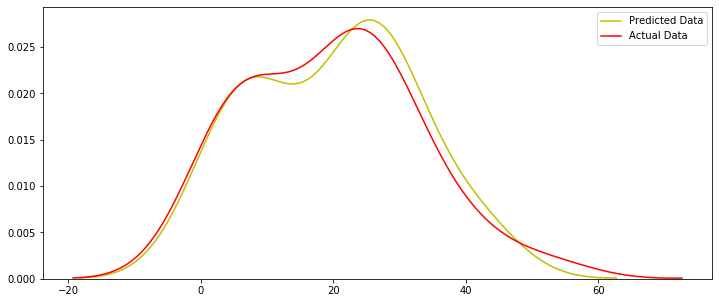

In [108]:
fig = plt.figure(figsize=(12, 5))

ax1 = sns.distplot(lr.predict(x_test), hist=False, color='y', label='Predicted Data')
ax2 = sns.distplot(y_test, hist=False,color='r', label='Actual Data', ax=ax1)